# Prophetでコロナ陽性者予測をしよう

## ライブラリの導入とインポート・初期設定


In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

## データの取得

### 日別陽性者数データ

In [3]:
# 厚生労働省の公開データ
url = 'https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv'

# データ読み込み
df = pd.read_csv(url, parse_dates=[0])

# 結果確認
display(df.head())

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020-01-16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
display(df.tail())

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
1131,2023-02-20,7028,240,31,78,254,35,70,125,235,116,88,241,250,510,395,116,49,43,43,68,159,141,398,225,274,56,83,433,280,48,110,80,62,164,428,106,45,72,109,48,195,32,61,91,105,74,127,35
1132,2023-02-21,19202,822,114,338,424,155,183,384,99,352,319,832,651,1451,882,457,313,275,170,191,367,599,469,1305,192,359,323,1329,707,224,166,147,256,353,194,373,221,226,381,168,909,145,194,332,186,156,391,118
1133,2023-02-22,18654,803,96,247,522,122,157,290,480,319,264,697,560,1195,846,428,235,191,172,135,570,401,533,1022,491,279,320,1191,1063,218,233,158,190,318,667,333,212,200,252,119,807,117,179,240,231,111,330,110
1134,2023-02-23,15193,626,146,191,415,92,156,291,354,286,310,595,448,1072,731,364,156,182,162,124,400,351,557,773,372,216,280,925,621,179,160,120,154,292,480,256,146,166,215,105,607,111,157,236,174,128,226,85
1135,2023-02-24,6512,241,38,76,150,29,48,119,275,108,84,202,183,427,379,131,36,68,55,68,210,138,347,216,247,72,102,342,385,59,103,60,53,124,423,113,53,56,75,41,131,35,78,58,91,31,121,31


## データ加工

In [5]:
# 東京都で絞り込み
df3 = df[["Date", "Tokyo"]]

# 列名変更
df3.columns = ['ds', 'y']

# 結果確認
display(df3.tail())

,ds,y
1131,2023-02-20,510
1132,2023-02-21,1451
1133,2023-02-22,1195
1134,2023-02-23,1072
1135,2023-02-24,427


## 時系列グラフ表示

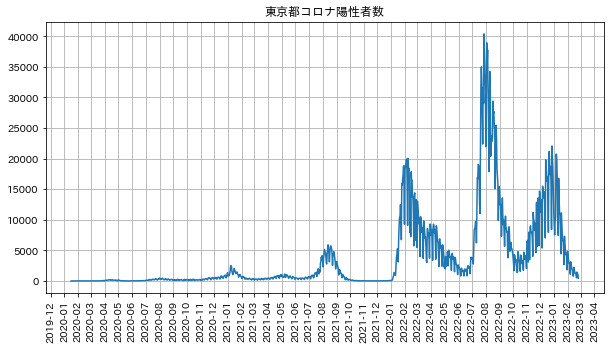

In [9]:
# 時系列グラフの描画 
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10, 5))

# グラフ描画
ax.plot(df3['ds'], df3['y'])

# 日付目盛間隔
# 木曜日ごとに目盛りを表示
#weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
# 月ごとに目盛りを表示
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.set_title('東京都コロナ陽性者数')

# 画面出力
plt.show()

## モデル構築、学習から予測まで

下の条件で、モデルを作ってみます。

* 最終日の14日前を基準日に、訓練データと検証データを分割する
* 二週間先（つまり昨日）までの予測をする
* 結果をグラフ表示する


### 訓練データ・検証データの分割

In [15]:
import pandas.tseries.offsets as offsets

# 分割日 mdayの設定 (最終日から14日前)
mday = df3['ds'].iloc[-1] - offsets.Day(14)

# 訓練用indexと検証用indexを作る
train_index = df3['ds'] <= mday
test_index = df3['ds'] > mday

# 入力データの分割
x_train = df3[train_index]
x_test = df3[test_index]

# 日付データの分割(グラフ表示用)
dates_test = df3['ds'][test_index]

### モデルの生成・学習

In [16]:
# ライブラリのimport
from fbprophet import Prophet

# モデルインスタンス生成
m1 = Prophet(yearly_seasonality=False, weekly_seasonality=True, 
    daily_seasonality=False,
    seasonality_mode='multiplicative')

# 学習
m1.fit(x_train)

### 予測と結果のグラフ化

In [17]:
# 予測用データの作成
future1 = m1.make_future_dataframe(periods=14, freq='D')

# 予測
# 結果はデータフレームで戻ってくる
fcst1 = m1.predict(future1)

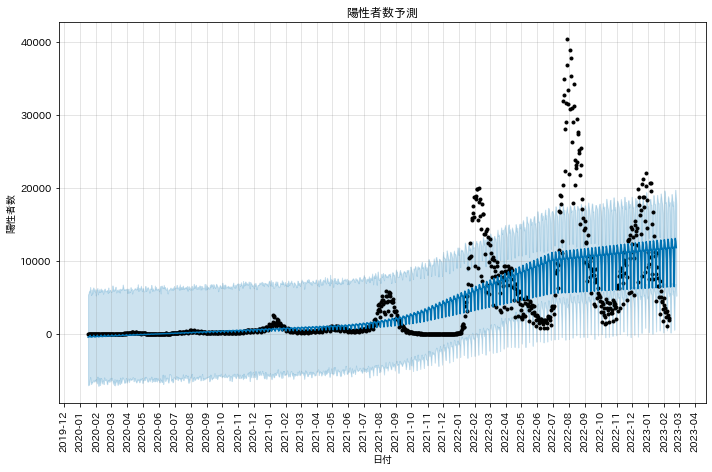

In [18]:
# 訓練データ・検証データ全体のグラフ化
fig, ax = plt.subplots(figsize=(10,6))

# 予測結果のグラフ表示(prophetの関数)
m1.plot(fcst1, ax=ax)
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# タイトル設定など
ax.set_title('陽性者数予測')
ax.set_xlabel('日付')
ax.set_ylabel('陽性者数')

# グラフ表示
plt.show()

予測の精度を議論する以前に、直近の予測値が感染爆発を起こしている実測値を表現できていないことがわかります。このままでは、正しく予測することは難しそうです。

## チューニング

In [19]:
df4 = df3.query('ds >"2021-06-14"')

In [20]:
display(df4.head())

,ds,y
516,2021-06-15,337
517,2021-06-16,500
518,2021-06-17,452
519,2021-06-18,453
520,2021-06-19,388


In [21]:
# 分割日 mdayの設定 (最終日から14日前)
mday = df3['ds'].iloc[-1] - offsets.Day(14)

# 訓練用indexと検証用indexを作る
train_index = df4['ds'] <= mday
test_index = df4['ds'] > mday

# 入力データの分割
x_train = df4[train_index]
x_test = df4[test_index]

# 日付データの分割(グラフ表示用)
dates_test = df4['ds'][test_index]

In [22]:
# モデルインスタンス生成
m2 = Prophet(yearly_seasonality=False, weekly_seasonality=True, 
    daily_seasonality=False,
    seasonality_mode='multiplicative')

# 学習
m2.fit(x_train)

# 予測用データの作成
future2 = m2.make_future_dataframe(periods=14, freq='D')

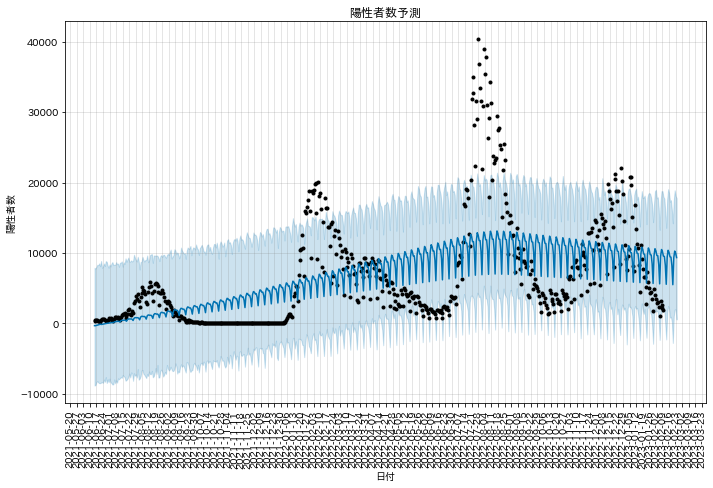

In [23]:
# 予測
# 結果はデータフレームで戻ってくる
fcst2 = m2.predict(future2)

# 訓練データ・検証データ全体のグラフ化
fig, ax = plt.subplots(figsize=(10,6))

# 予測結果のグラフ表示(prophetの関数)
m2.plot(fcst2, ax=ax)
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# タイトル設定など
ax.set_title('陽性者数予測')
ax.set_xlabel('日付')
ax.set_ylabel('陽性者数')

# グラフ表示
plt.show()

In [24]:
# ypred2: fcst1から予測部分のみ抽出する
ypred2 = fcst2[-14:][['yhat']].values

# ytest1: 予測期間中の正解データ
ytest2 = x_test['y'].values

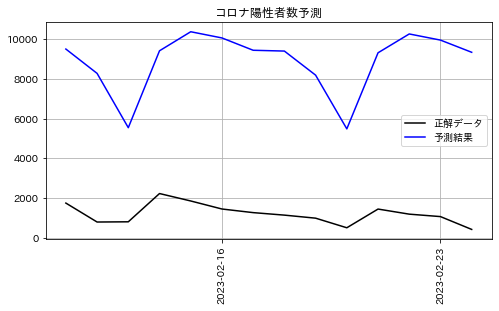

In [25]:
# 時系列グラフの描画 
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# グラフ描画
ax.plot(dates_test, ytest2, label='正解データ', c='k')
ax.plot(dates_test, ypred2, label='予測結果', c='b')

# 日付目盛間隔
# 木曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日付表記を90度回転
ax.tick_params(axis='x', rotation=90)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('コロナ陽性者数予測')

# 画面出力
plt.show()

## おまけ

In [19]:
# 祝日データ取得
url2 = 'https://raw.githubusercontent.com/holiday-jp/holiday_jp/master/holidays.yml'
df5 = pd.read_csv(url2, sep=':\s+', parse_dates=[0],names=['日付','祝日名'])
df5 = df2[1:]

NameError: name 'df2' is not defined

In [ ]:
display(df5.head())
display(df5.tail())

In [ ]:
# 2020-2021に絞り込み
df2 = df2.query('日付>"2019-12-31" & 日付<"2021-12-31"')

In [ ]:
display(df5.head())
display(df5.tail())